# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder


# Load the Dataset

In [2]:
import os

file_path = '/Users/a1/Downloads/USA_Housing.csv'
os.getcwd()
file_path


'/Users/a1/Downloads/USA_Housing.csv'

In [3]:
file_path = '/Users/a1/Desktop/USA_Housing.csv'

In [4]:
df = pd.read_csv(file_path)

# Make a copy of the dataset

In [5]:
copy_data = df.copy()

# Display the first five rows

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Display the last five rows

In [7]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


# Total rows and Columns in the dataset

In [8]:
df.shape

print(f'The Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The Dataset has 5000 rows and 7 columns


# Checking for Missing Values

In [9]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Display the data types of the columns

In [10]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

# Checking for Duplicates

In [11]:
df.duplicated().sum()

print(f'Number of duplicates: {df.duplicated().sum()} ')

Number of duplicates: 0 


# Dropping the address column

In [12]:
# df = df.drop(columns = ['Address'])
# df.columns
# df.head()
copy_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Descriptive Analysis

### Summary of the dataset

In [13]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Average House Price in the USA housing

In [14]:
average_house_price = df['Price'].mean()
print(f'The average house price in the USA is ${average_house_price:.2f}')

The average house price in the USA is $1232072.65


### Expensive and Cheapest Houses

In [15]:
expensive_house = df.loc[df['Price'].idxmax()]
cheapest_house = df.loc[df['Price'].idxmin()]

expensive_house
# cheapest_house

Avg. Area Income                                  90592.469609
Avg. Area House Age                                   7.700132
Avg. Area Number of Rooms                             9.708803
Avg. Area Number of Bedrooms                              5.19
Area Population                                   37223.876167
Price                                           2469065.594175
Address                         USNS Vargas\nFPO AE 56319-6904
Name: 465, dtype: object

### Correlation between different feature

In [16]:
df.drop(columns = ['Address'], inplace=True)
# df.head()
correlation = df.corr()
correlation

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Visualize using heatmap

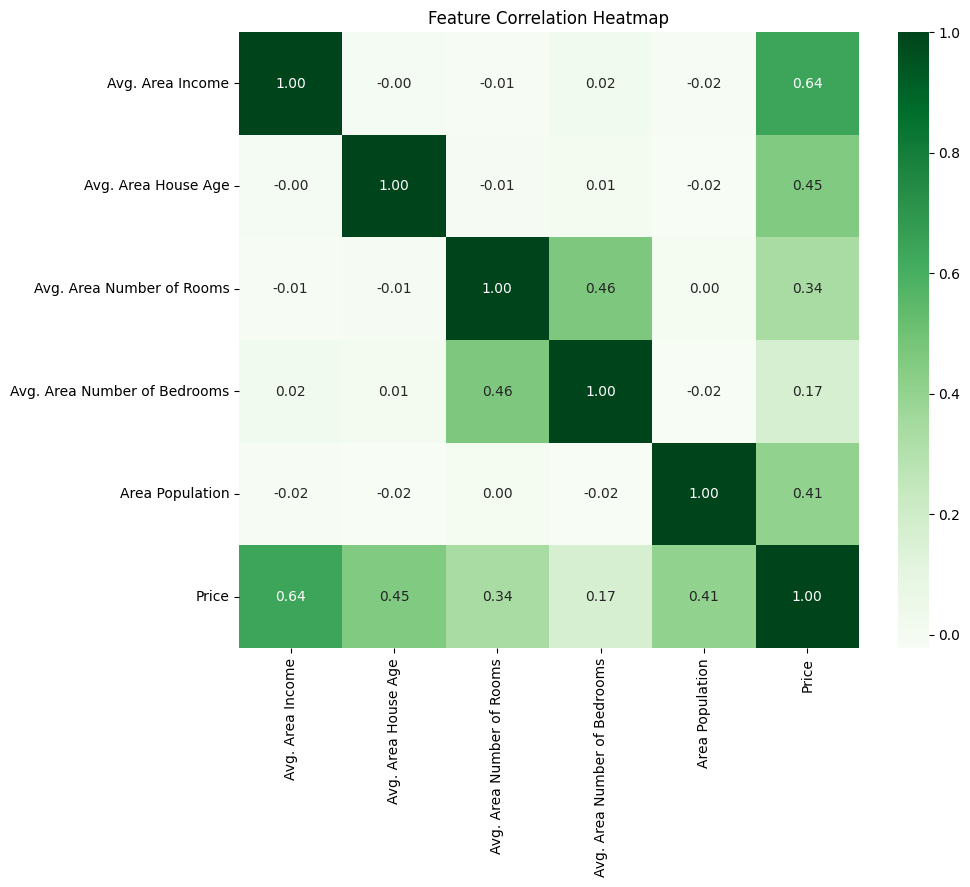

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


### Distribution of house prices

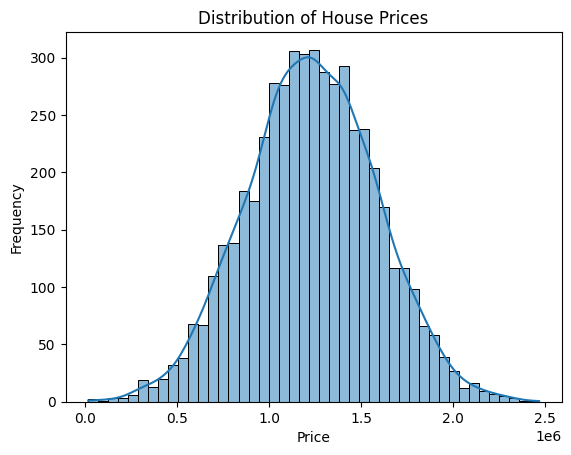

In [18]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### House Prices prediction

#### Splitting the data into X array containing feature to train on and Y array with the target variable

In [19]:
X = df.drop(columns = ['Price'], axis=1)
Y = df.drop(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'], axis = 1)


####Show X and Y

In [20]:
X.shape, Y.shape

((5000, 5), (5000, 1))

In [21]:
Scaler = StandardScaler()
Scaler

StandardScaler()

In [22]:
scaled_data = Scaler.fit_transform(X)
scaled_data

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]],
      shape=(5000, 5))

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3000, 5), (2000, 5), (3000, 1), (2000, 1))

In [24]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [25]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

#### Model Build -- Linear Regression

In [26]:
model = LinearRegression()

In [27]:

model.fit(X_train, Y_train)

LinearRegression()

In [28]:
Pred = model.predict(X_test)

Text(0, 0.5, 'Pred')

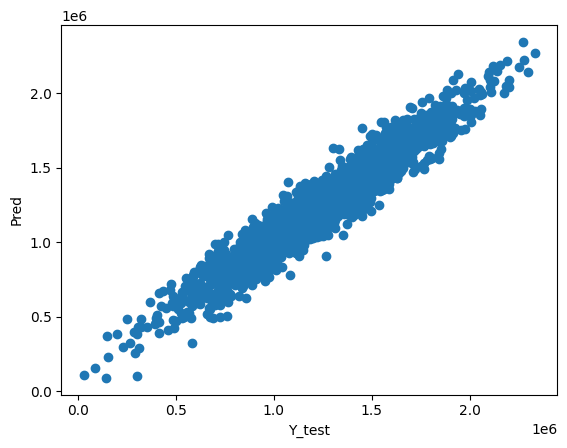

In [29]:
plt.scatter(Y_test, Pred)
plt.xlabel('Y_test')
plt.ylabel('Pred')

In [30]:
Y_test, Y_train

"metadata: {"

'metadata: {'

In [31]:
model.intercept_

array([-2640159.79685171])

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
ratio= r2_score(Y_test, Pred)
ratio

0.9176824009649193

In [34]:
!pip install metrics

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(Y_test, Pred))
print('MSE:', metrics.mean_squared_error (Y_test, Pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Pred)))

MAE: 82288.22251914945
MSE: 10460958907.2096
RMSE: 102278.82922291201


In [38]:
# from ydata_profiling import ProfileReport

In [39]:
# profile = ProfileReport(df, title='House_Prediction_Report', explorative=True)
# profile.to_notebook_iframe()
# # profile.to_file('House_prediction_Report.html')

In [40]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
